<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/16%20Five_Flower_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

# Image Classification using tf.keras

In [23]:
import tensorflow as tf
import glob
import PIL
import os
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used
from keras.layers import Dense,Conv2D,Dropout, BatchNormalization,MaxPooling2D, ZeroPadding2D, Flatten

from keras.utils import np_utils                         # NumPy related tools

# Data Loading

In [8]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228827136/228813984 [==============================] - 2s 0us/step


The dataset we downloaded contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

So, let's create the labels for these 5 classes: 

In [3]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [12]:
base_dir
import shutil

In [13]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


For convenience, let us set up the path for the training and validation sets

In [14]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [150]:
len(train_dir) ,len(val_dir)

(41, 39)

In [151]:
os.listdir(train_dir)

['dandelion', 'roses', 'tulips', 'daisy', 'sunflowers']

In [15]:
train_dandelion_dir = os.path.join(train_dir, 'dandelion') 
train_roses_dir = os.path.join(train_dir, 'roses') 
train_tulips_dir = os.path.join(train_dir, 'tulips') 
train_daisy_dir = os.path.join(train_dir, 'daisy') 
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers') 

In [16]:
total_train= len(train_dandelion_dir) + len(train_roses_dir) + len(train_tulips_dir) + len(train_daisy_dir)  + len(train_sunflowers_dir)
total_train

245

In [154]:
os.listdir(val_dir)

['dandelion', 'roses', 'tulips', 'daisy', 'sunflowers']

In [17]:
valid_dandelion_dir = os.path.join(val_dir, 'dandelion') 
valid_roses_dir = os.path.join(val_dir, 'roses') 
valid_tulips_dir = os.path.join(val_dir, 'tulips') 
valid_daisy_dir = os.path.join(val_dir, 'daisy') 
valid_sunflowers_dir = os.path.join(val_dir, 'sunflowers') 

In [18]:
total_val= len(valid_dandelion_dir) + len(valid_roses_dir) + len(valid_tulips_dir) + len(valid_daisy_dir)  + len(valid_sunflowers_dir)
total_val

235

# Data Augmentation

In [19]:
batch_size =100
IMG_SHAPE = (150,150)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

## Checking size of images  in Image form and Tensor form
### The images are in the form of jpg format and can be read using PIL library . They have width and height dimensions.

### They can be converted to Image array using **keras.preprocessing.image.image_to_array** library

In [24]:
directory=base_dir + '/train/dandelion'
os.chdir(directory)
os.getcwd()
a=os.listdir()[0:2]
for i in a:
  img = PIL.Image.open(i)
  print(img.size)


(186, 240)
(197, 240)


In [26]:
a=os.listdir()[0:4]

image_tensors=[]
for i in a:
  image_tensors.append(tf.keras.preprocessing.image.img_to_array(PIL.Image.open(i), data_format=None, dtype=None))
for i in image_tensors:
  print(i.shape)

(240, 186, 3)
(240, 197, 3)
(240, 320, 3)
(332, 500, 3)


In [27]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    #axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### TODO: Put It All Together

In the cell below, use ImageDataGenerator to create a transformation that rescales the images by 255 and that applies:

- random 45 degree rotation
- random zoom of up to 50%
- random horizontal flip
- width shift of 0.15
- height shift of 0.15

Then use the `.flow_from_directory` method to apply the above transformation to the images in our training set. Make sure you indicate the batch size, the path to the directory of the training images, the target size for the images, to shuffle the images, and to set the class mode to `sparse`.

In [28]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
batch_size = 100
IMG_SHAPE = 150 
IMG_SHAPE=150

In [163]:
train_dir ,val_dir

('/root/.keras/datasets/flower_photos/train',
 '/root/.keras/datasets/flower_photos/val')

In [29]:
train_dirr=base_dir + '/train'
val_dirr=base_dir + '/val' 
train_dirr , val_dirr

('/root/.keras/datasets/flower_photos/train',
 '/root/.keras/datasets/flower_photos/val')

In [38]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 2935 images belonging to 5 classes.


Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset. 

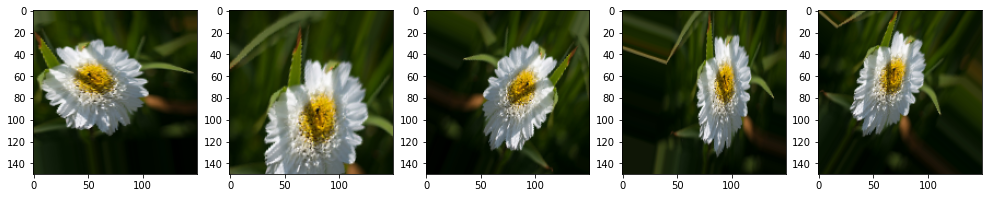

In [39]:
fig, axx =plt.subplots(1,5,figsize=(17,17))
for i in range(5):
  image=train_data_gen[0][0][0]
  axx[i].imshow(image)

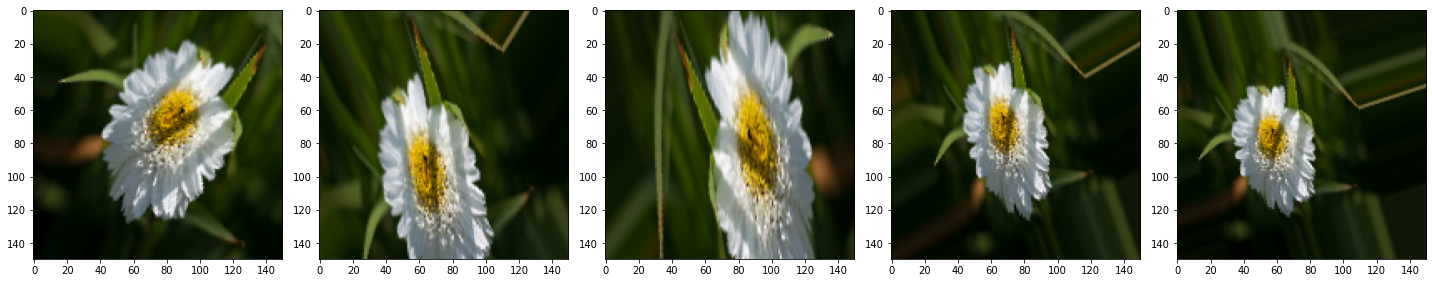

In [46]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

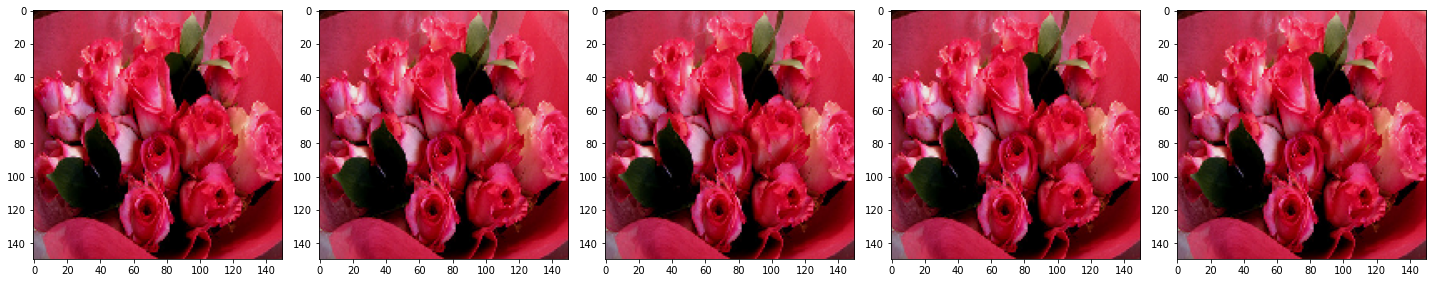

In [47]:
augmented_images = [val_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

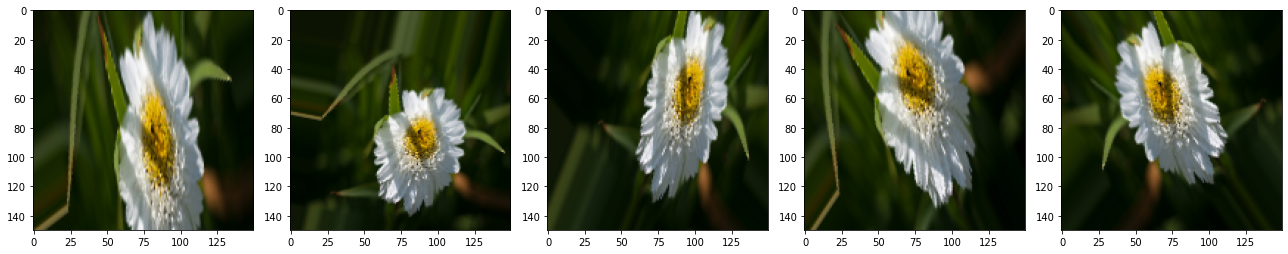

(150, 150, 3)
(150, 150, 3)


In [53]:
fig, axx=plt.subplots(1,5,figsize=(18,18))

for i in range(5):
  axx[i].imshow(train_data_gen[0][0][0])
  
  
plt.tight_layout()
plt.show()


print(val_data_gen[0][0][0].shape)
print(train_data_gen[0][0][0].shape)

### TODO: Create a Data Generator for the Validation Set

Generally, we only apply data augmentation to our training examples. So, in the cell below, use ImageDataGenerator to create a transformation that only rescales the images by 255. Then use the `.flow_from_directory` method to apply the above transformation to the images in our validation set. Make sure you indicate the batch size, the path to the directory of the validation images, the target size for the images, and to set the class mode to `sparse`. Remember that it is not necessary to shuffle the images in the validation set. 

In [56]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(directory=val_dir, batch_size=100 , class_mode='sparse',target_size=(150,150))

Found 735 images belonging to 5 classes.


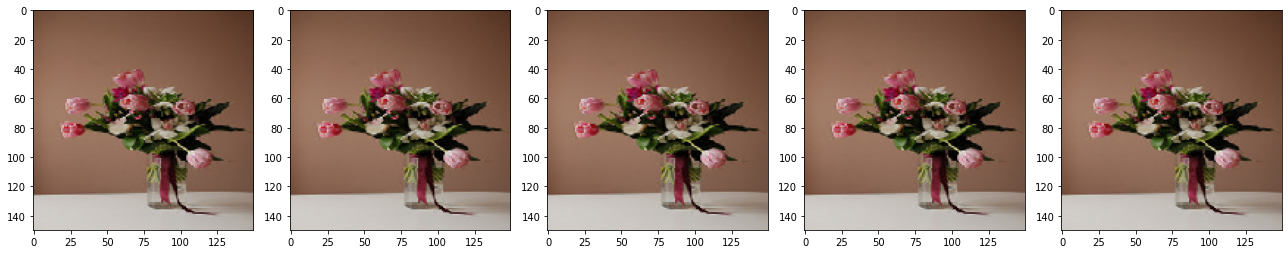

(150, 150, 3)
(150, 150, 3)


In [57]:
fig, axx=plt.subplots(1,5,figsize=(18,18))

for i in range(5):
  axx[i].imshow(val_data_gen[0][0][0])
  
  
plt.tight_layout()
plt.show()


print(val_data_gen[0][0][0].shape)
print(train_data_gen[0][0][0].shape)

# TODO: Create the CNN

In the cell below, create a convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a `Conv2D` layer followed by a max pool layer. The first convolutional block should have 16 filters, the second one should have 32 filters, and the third one should have 64 filters. All convolutional filters should be 3 x 3. All max pool layers should have a `pool_size` of `(2, 2)`.

After the 3 convolutional blocks you should have a flatten layer followed by a fully connected layer with 512 units. The CNN should output class probabilities based on 5 classes which is done by the **softmax** activation function. All other layers should use a **relu** activation function. You should also add Dropout layers with a probability of 20%, where appropriate. 

In [37]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels and its  3d

In [58]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3, padding='same', activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax')) #working

In [190]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5)) #working

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #working

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# working in case of softmax


#  Train the Model

In the cell below, train your model using the **fit_generator** function instead of the usual **fit** function. We have to use the `fit_generator` function because we are using the **ImageDataGenerator** class to generate batches of training and validation data for our model. Train the model for 80 epochs and make sure you use the proper parameters in the `fit_generator` function.

In [61]:
steps_per_epoch1=int(np.ceil(total_train/ BATCH_SIZE))
validation_steps1=int(np.ceil(total_val / BATCH_SIZE))
steps_per_epoch1 , validation_steps1 ,total_train,total_val ,BATCH_SIZE

(3, 3, 245, 235, 100)

In [62]:
epochs = 80
BATCH_SIZE=100

history=model.fit(train_data_gen ,epochs=80, steps_per_epoch=steps_per_epoch1 ,validation_data=val_data_gen,validation_steps= validation_steps1)

Epoch 1/80
3/3 [==============================] - 32s 1s/step - loss: 2.3173 - accuracy: 0.1872 - val_loss: 2.0986 - val_accuracy: 0.2800
Epoch 2/80
3/3 [==============================] - 4s 2s/step - loss: 1.8358 - accuracy: 0.3300 - val_loss: 1.5865 - val_accuracy: 0.3300
Epoch 3/80
3/3 [==============================] - 4s 2s/step - loss: 1.6105 - accuracy: 0.2433 - val_loss: 1.5862 - val_accuracy: 0.3267
Epoch 4/80
3/3 [==============================] - 4s 2s/step - loss: 1.5717 - accuracy: 0.3033 - val_loss: 1.5580 - val_accuracy: 0.2367
Epoch 5/80
3/3 [==============================] - 4s 2s/step - loss: 1.5319 - accuracy: 0.2933 - val_loss: 1.4620 - val_accuracy: 0.3000
Epoch 6/80
3/3 [==============================] - 4s 2s/step - loss: 1.4474 - accuracy: 0.3967 - val_loss: 1.4342 - val_accuracy: 0.3600
Epoch 7/80
3/3 [==============================] - 4s 1s/step - loss: 1.4063 - accuracy: 0.3574 - val_loss: 1.3734 - val_accuracy: 0.3533
Epoch 8/80
3/3 [========================

# TODO: Plot Training and Validation Graphs.

In the cell below, plot the training and validation accuracy/loss graphs.

In [64]:
history1=history.history


<function dict.keys>

In [87]:
history1.keys()  , epochs , np.linspace(0,80,num=80)[0:4] , len(history1['accuracy']) ,len(history1['val_accuracy'])

(dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']),
 80,
 array([0.        , 1.01265823, 2.02531646, 3.03797468]),
 80,
 80)

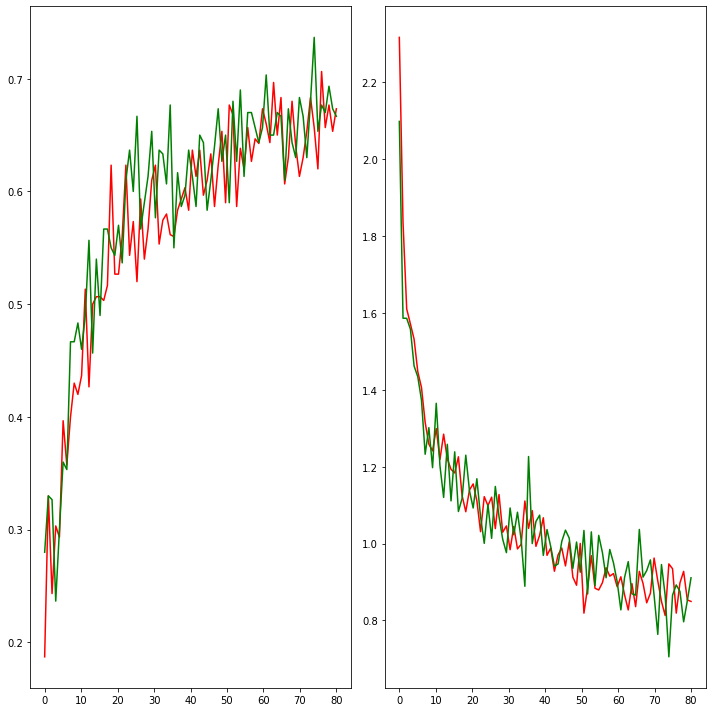

In [82]:
fig , axx =plt.subplots(1,2 ,figsize=(10,10))
axx[0].plot(np.linspace(0,80,num=80,),history1['accuracy'],'r')
axx[0].plot(np.linspace(0,80,num=80,),history1['val_accuracy'],'g')

axx[1].plot(np.linspace(0,80,num=80,),history1['loss'],'r')
axx[1].plot(np.linspace(0,80,num=80,),history1['val_loss'],'g')
plt.tight_layout()

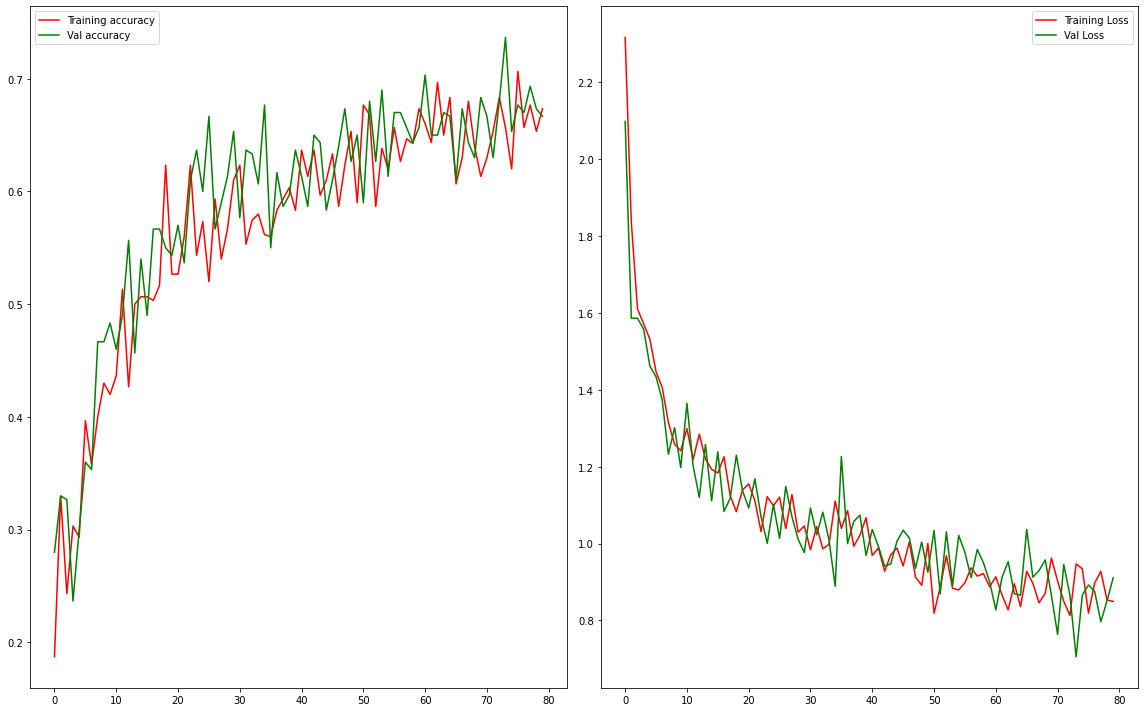

In [107]:
accuracy=history1['accuracy']
val_accuracy=history1['val_accuracy']
fig , axx =plt.subplots(1,2 ,figsize=(16,10))

axx[0].plot(range(0, 80),history1['accuracy'],'r',label='Training accuracy')
axx[0].plot(range(0, 80),history1['val_accuracy'],'g',label='Val accuracy')
axx[0].set_label('a')
axx[0].legend()
axx[1].plot(range(0, 80),history1['loss'],'r',label='Training Loss')
axx[1].plot(range(0, 80),history1['val_loss'],'g',label='Val Loss')
axx[1].legend()
plt.tight_layout()

